In [2]:
from plotnine import *
import pandas as pd

In [ ]:

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-04_19:53" # classifier_reg
time = "2024-02-04_22:36" # classifier_reg
time = "2024-02-05_12:00" # reg
time = "2024-02-05_22:08" # reg


df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name']).mean().reset_index()

# filter where 'Dataset' contains 'log'
log_df = df[df['Dataset'].str.contains('log')]

log_df

In [3]:

from plotnine import *
import pandas as pd

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-04_19:53" # classifier_reg
time = "2024-02-04_22:36" # classifier_reg
time = "2024-02-05_10:50" # reg
time = "2024-02-05_12:00" # reg
time = "2024-02-05_22:08" # reg



df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
df = df.drop(columns=['Index of Predicted Column'])
df = df.rename(columns={'Predicted Column Name': 'Column_Name'})
df = df.groupby(['Dataset', 'Algorithm', 'Column_Name', 'FoldID']).mean().reset_index()

df = df[(df['Dataset'] == "amgut1") | (df['Dataset'] == "crohns") | (df['Dataset'] == "ioral")]
df

,Dataset,Algorithm,Column_Name,FoldID,Mean Squared Error
0,amgut1,Featureless,X108747,0,1.001759
1,amgut1,Featureless,X108747,1,1.041601
2,amgut1,Featureless,X108747,2,1.023414
3,amgut1,Featureless,X119010,0,0.973466
4,amgut1,Featureless,X119010,1,0.974514
...,...,...,...,...,...
7834,ioral,LassoCV,Veillonella,1,0.685905
7835,ioral,LassoCV,Veillonella,2,0.858359
7836,ioral,LassoCV,Xanthomonas,0,0.801731
7837,ioral,LassoCV,Xanthomonas,1,0.874104


# REGRESSION

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


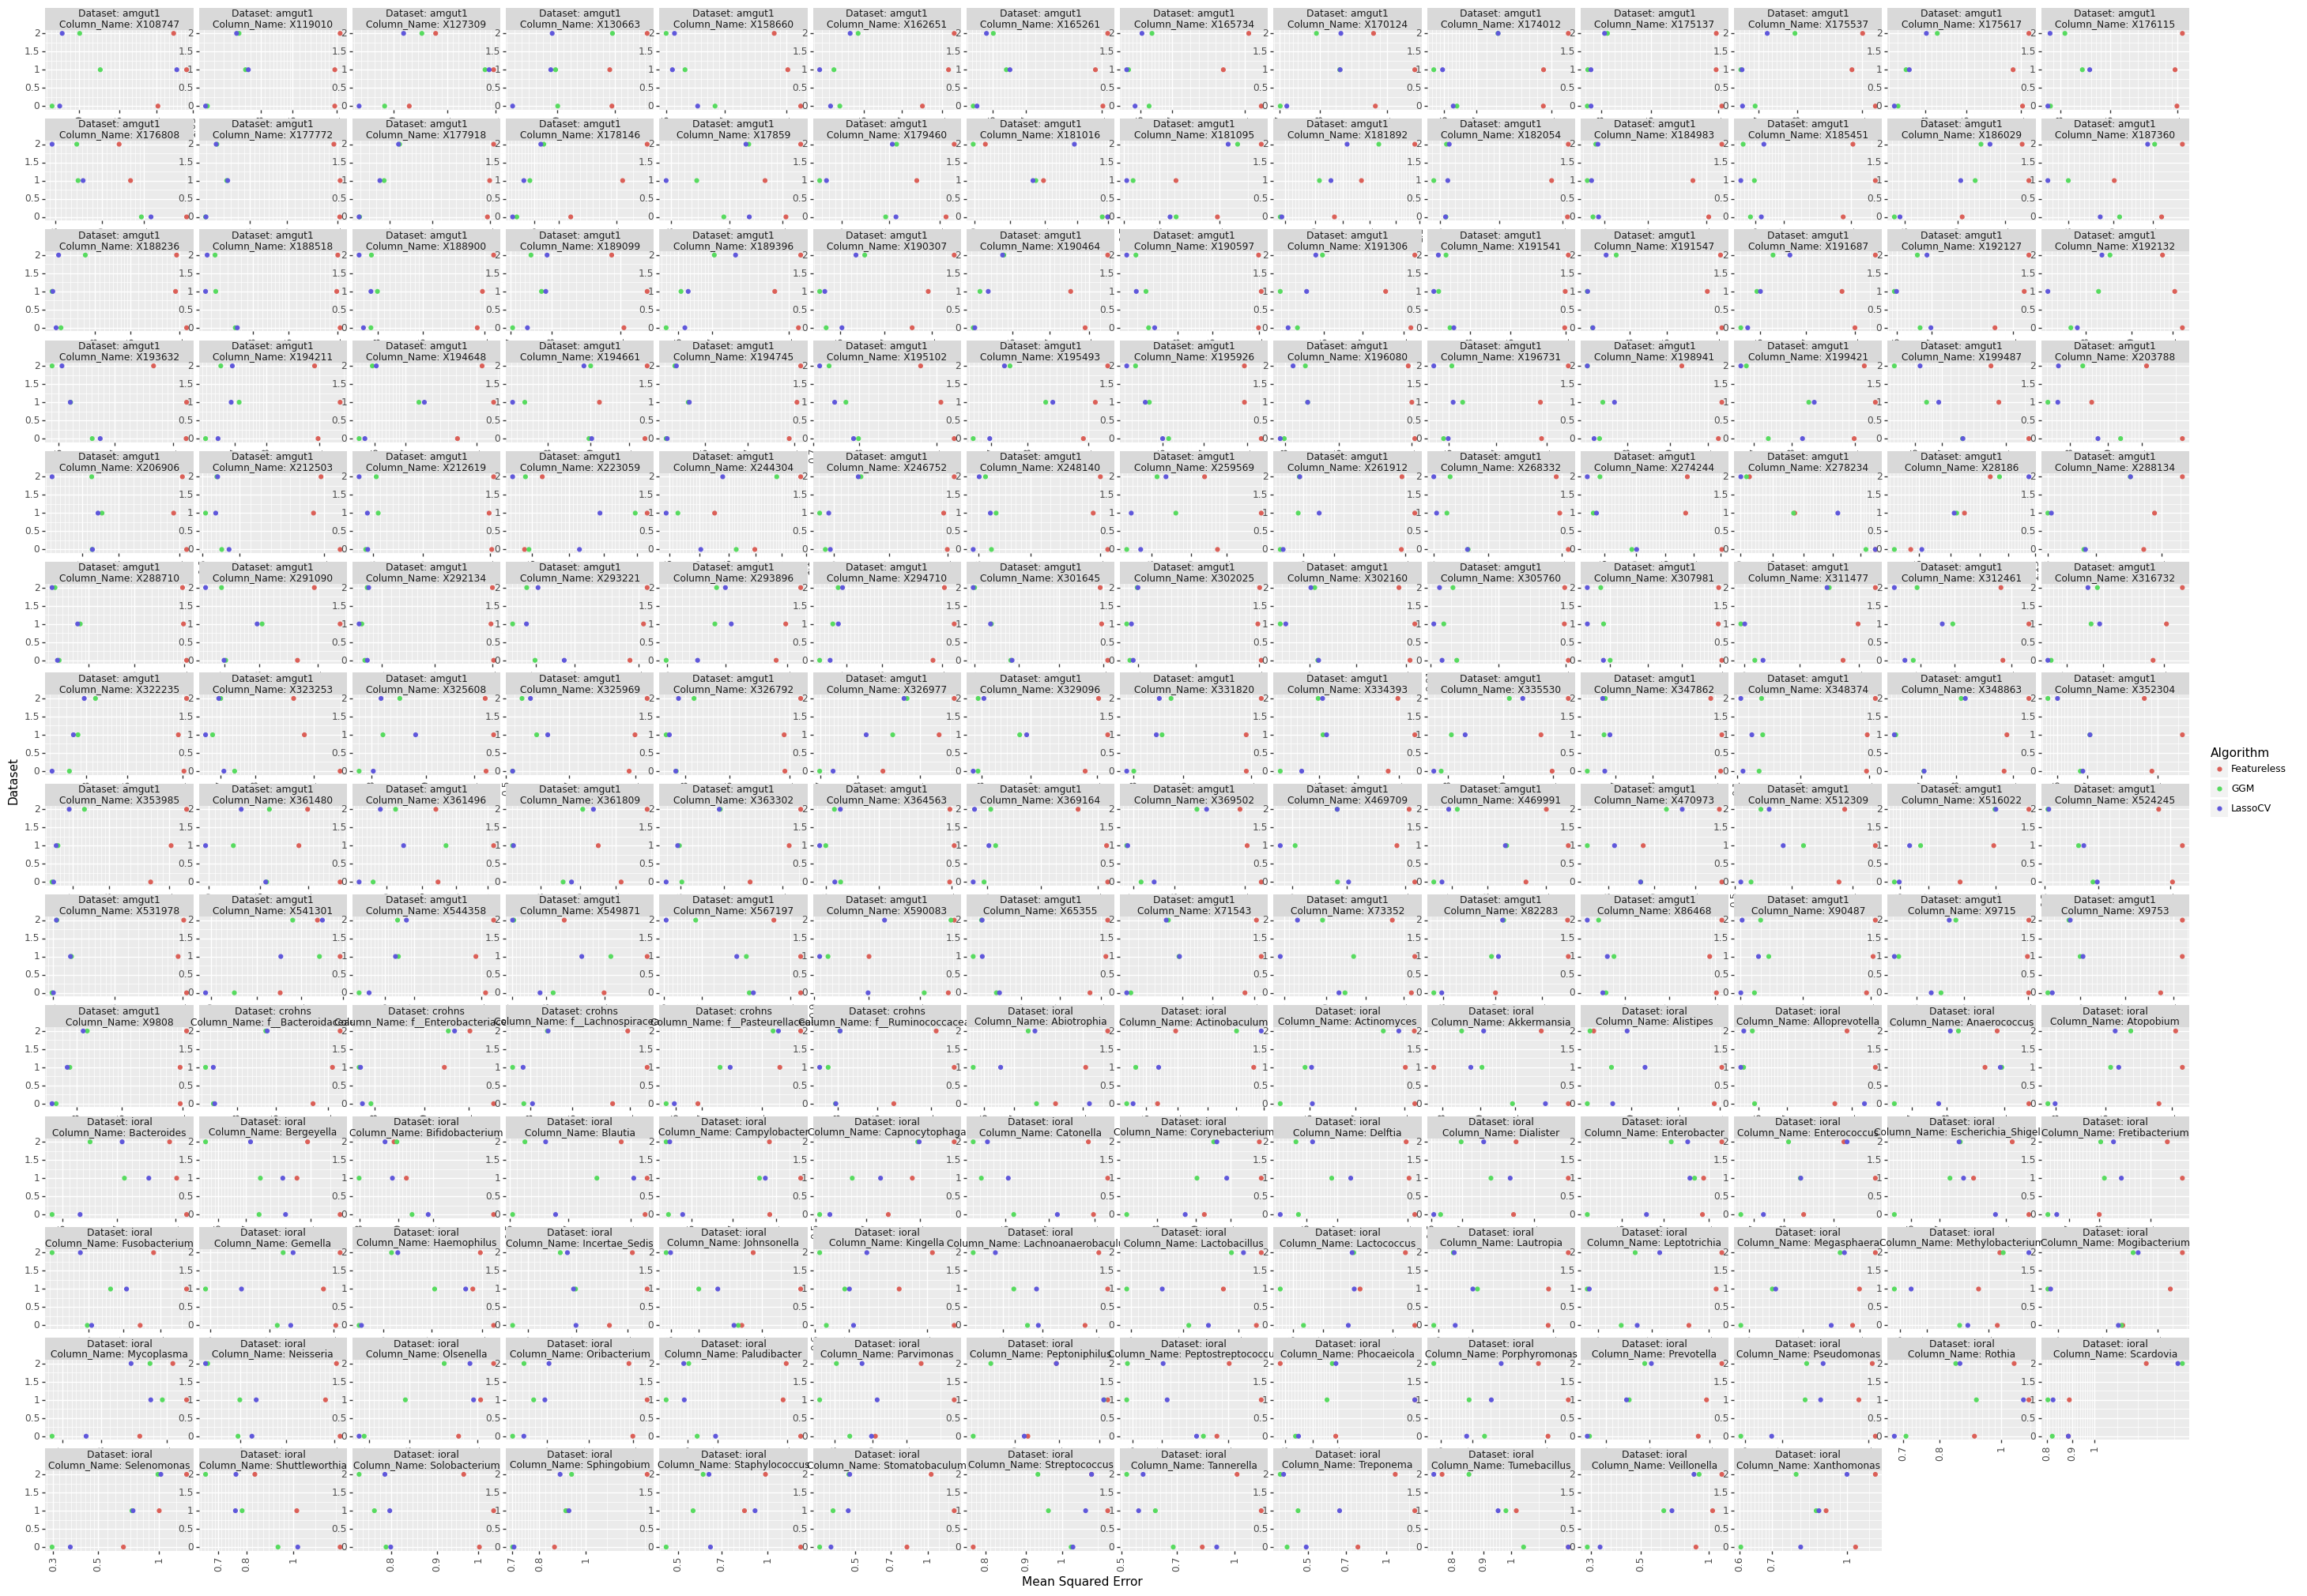

In [4]:

p = ggplot(df)
p = p + geom_point(aes(x="Mean Squared Error", y="FoldID", color="Algorithm"))
p = p + facet_wrap("~ Dataset + Column_Name", scales="free", labeller='label_both')
p = p + labs(y="Dataset")
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(35, 25))
p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "plot.png", dpi=3000)


# CLASSIFICATION

In [ ]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Test Accuracy", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(x="Accuracy", y="Dataset")
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
# p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "binary_classification.png", dpi=300)

In [ ]:
from plotnine import *
import pandas as pd
import numpy as np

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-02_11:33"

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# convert 'FPR' and 'TPR' columns from string to array
df['FPR'] = df['FPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" ") )
df['TPR'] = df['TPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" ") )

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

# filter where 'Dataset' contains 'log'
# log_df = df[df['Dataset'].str.contains('log')]

# log_df
df